[0.0, 1.9999999999999998, 3.3414907009731776, 1.7772515199683616, 3.0758623772073723, 2.0906521958521016, 2.8679271974054226, 2.400057273533156, 2.679570134494409, 2.699462218081708, 2.432213890606423, 3.060508713581344, 2.0810444528538223, 3.321103163118942, 1.8080653067522976, 3.12381569982508, 2.0238310455033424, 2.9001260648012144, 2.347495967243468, 2.7157368692602613, 2.6368701882747825, 2.487566659836771, 2.9779029094586247, 2.1632409493978795, 3.2781472438233763, 1.8582831809567724, 3.170977059334545, 1.9621706226288746, 2.9321188908361737, 2.2960005684711717, 2.7493329448204, 2.5783001888126904, 2.5371423902117773, 2.898953243606844, 2.240828507429669, 3.2154715856576304, 1.9246477513978169, 3.2031798904031423, 1.924479774029994, 2.963097549291323, 2.2472709160522624, 2.779860244636709, 2.5254695272802823, 2.5800412824172327, 2.828448974151885, 2.3087801048521355, 3.146408238869813, 1.995134690847717, 3.2155103297905865, 1.9135289887120603, 2.994406866093798, 2.199616697077504

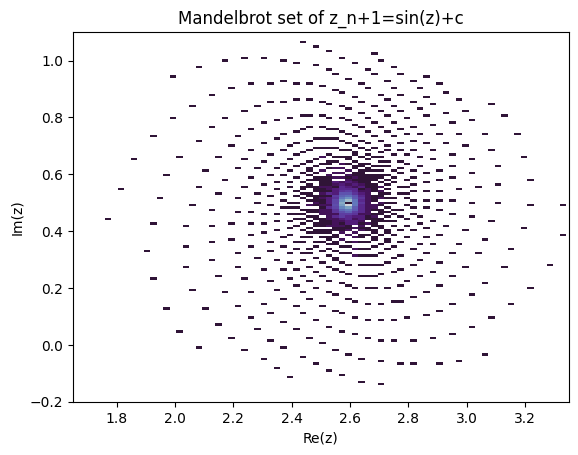

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import colors

# MANDELBROT SET ALGORITHM
# 1. Initialize a list as [0]
# 2. Loop through n values starting at 1
# 3. Use the value of list[n-1] as current z value
# 4. z+1 = evolve(z_curr)
# 5. Append the new z to the list
# 6. Loop through list and plot x=rcos(angle) and y=rsin(angle) on a scatterplot

start = complex(0, 0)
#a = 2
#b = 0.9
a = 2
b = 0.94

def evolve(z_n):
    # Real and imaginary components of z_n
    z_n_real = z_n.real
    z_n_complex = z_n.imag

    # Determine z_n+1 real and imaginary components
    new_z_real = a + np.sin(z_n_real) * np.cosh(z_n_complex)
    new_z_imag = b + np.cos(z_n_real) * np.sinh(z_n_complex)

    new_z = complex(new_z_real, new_z_imag)
    return new_z

Z = [start]

n = 100000

for i in range(1, n):
    z_n = Z[i-1]
    Z.append(evolve(z_n))

def find_coord(z):
    mag = np.power(z.real**2 + z.imag**2, 1/2)
    if (z.real != 0):
        angle = np.arctan(z.imag / z.real)
    else:
        angle = 0
    x = mag * np.cos(angle)
    y = mag * np.sin(angle)
    return [x, y]

x_coords = []
y_coords = []

for z in Z:
    coord = find_coord(z)
    x_coords.append(coord[0])
    y_coords.append(coord[1])

print(x_coords)
print(y_coords)

plt.figure('2')
#ax.hist2d(x, y, norm = colors.LogNorm())
plt.hist2d(x_coords, y_coords, norm = colors.LogNorm(), bins=150, cmap=plt.cm.twilight_shifted)
plt.xlim([1.65, 3.35])
plt.ylim([-0.2, 1.1])
plt.title('Mandelbrot set of z_n+1=sin(z)+c')
plt.xlabel('Re(z)'); plt.ylabel('Im(z)')
plt.show()



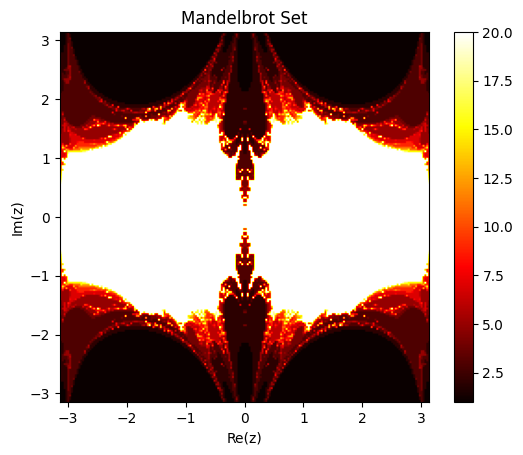

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(a,b,N,threshold):
    x = a
    y = b
    for n in range(0, N):
        if abs(np.sqrt(x**2 + y**2)) > threshold:
            return n 
        x = np.sin(x)*np.cosh(y) + a
        y = np.cos(x)*np.sinh(y) + b
    return N

def mandelbrotSet(N, xmin, ymin, xmax, ymax, width, height, threshold):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    image = np.empty((width, height))

    for i in range(width):
        for j in range(height):
            a = x[i]
            b = y[j]
            color = mandelbrot(a, b, N, threshold)
            image[i, j] = color
    return image

def plot_mandelbrot(N, xmin, xmax, ymin, ymax, width, height, threshold):
    image = mandelbrotSet(N, xmin, ymin, xmax, ymax, width, height, threshold)

    plt.imshow(image.T, extent=(xmin, xmax, ymin, ymax), cmap='hot', origin='lower')
    plt.colorbar()
    plt.title(f"Mandelbrot Set")
    plt.xlabel('Re(z)'); plt.ylabel('Im(z)')
    plt.show()

threshold = 2*np.pi
N = 20
xmin, ymin = -np.pi, -np.pi
xmax, ymax = np.pi, np.pi
width = 200
height = 200

plot_mandelbrot(N, xmin, xmax, ymin, ymax, width, height, threshold)